https://scipy-lectures.org/advanced/image_processing/

In [1]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [2]:
l = 100

x, y = np.indices((l, l))

center1 = (28, 24)

center2 = (40, 50)

center3 = (67, 58)

center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2

circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2

circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2

circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

# 4 circles

img = circle1 + circle2 + circle3 + circle4

mask = img.astype(bool)

img = img.astype(float)
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
img += 1 + 0.2*np.random.randn(*img.shape)
img

array([[0.92200178, 1.04913148, 0.71845324, ..., 0.91236873, 0.84461202,
        1.01638525],
       [0.80556737, 0.93967451, 1.13610167, ..., 0.68127719, 1.08737003,
        0.94399888],
       [1.19367821, 0.69123605, 1.09219446, ..., 1.35440004, 0.95707252,
        0.75563492],
       ...,
       [1.10148296, 0.85622104, 0.93515387, ..., 1.05207467, 1.34823189,
        0.75221892],
       [1.13256989, 0.82857815, 0.84260839, ..., 1.08743582, 0.94119297,
        1.20928339],
       [1.35169649, 1.0574816 , 1.12135768, ..., 1.05249607, 1.02893771,
        1.06994813]])

In [4]:
# Convert the image into a graph with the value of the gradient on

# the edges.

graph = image.img_to_graph(img, mask=mask)
graph

<2678x2678 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in COOrdinate format>

In [5]:
# Take a decreasing function of the gradient: we take it weakly

# dependant from the gradient the segmentation is close to a voronoi

graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')

label_im = -np.ones(mask.shape)

label_im[mask] = labels

## 2.6.6. Measuring objects properties: ndimage.measurements

In [6]:
from scipy import ndimage 
import matplotlib.pyplot as plt

In [7]:
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
mask = im > im.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_52096\336713393.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1


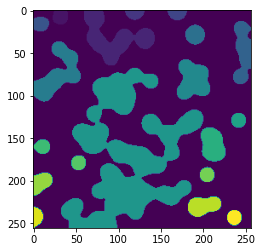

In [8]:
label_im, nb_labels = ndimage.label(mask)
nb_labels # how many regions?

plt.imshow(label_im)

C:\Users\User\AppData\Local\Temp\ipykernel_52096\3433773850.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1


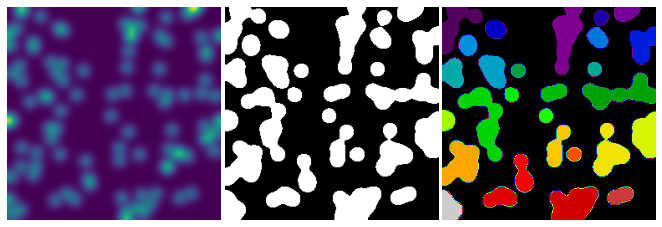

In [9]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

label_im, nb_labels = ndimage.label(mask)

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.subplot(132)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(label_im, cmap=plt.cm.nipy_spectral)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()

In [10]:
from os import getcwd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import sys
sys.path.append("c:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
from ara_commons import ara_picture_function as ara_p
from ara_commons.ara_file import get_dir_files

In [11]:
# Récupère le répertoire du programme
file_path = getcwd() + "\\"
file_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\ara_training\\'

In [12]:
source_data_path = file_path.replace("ara_training", "dataset")
source_data_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\vae_weather_picture\\dataset\\'

In [13]:
np.random.seed(1)

In [14]:
img_name = "cloudy1.jpg"

In [15]:
from random import randint

cloudy1.jpg


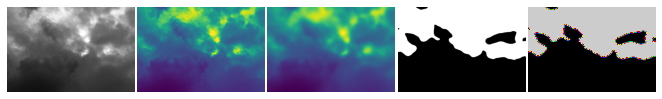

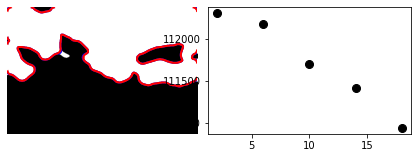

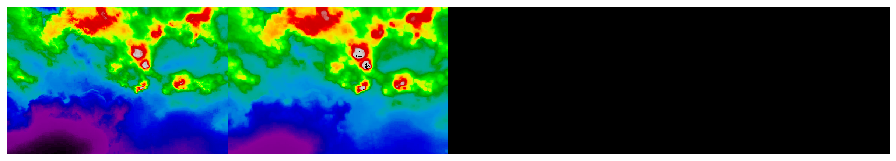

cloudy26.jpg


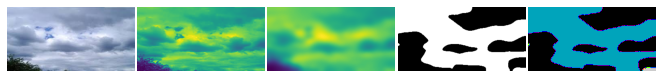

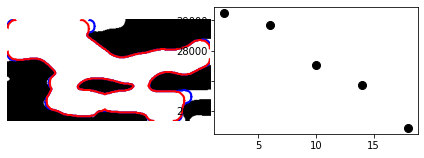

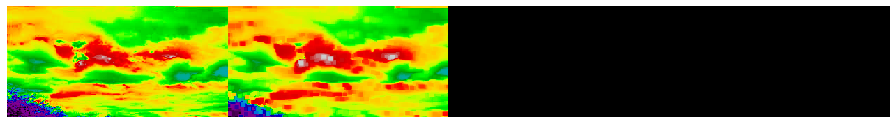

shine84.jpg


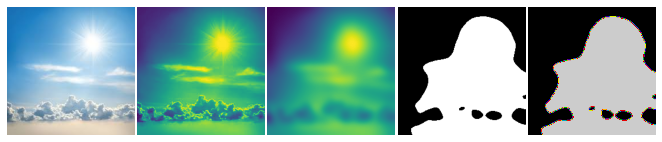

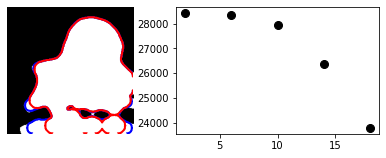

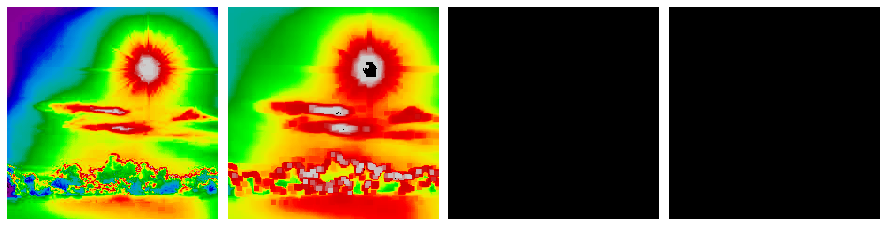

rain189.jpg


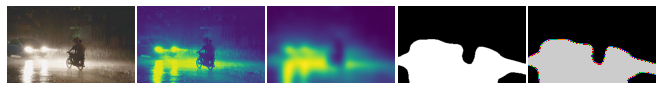

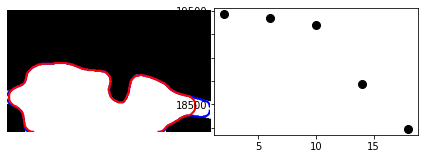

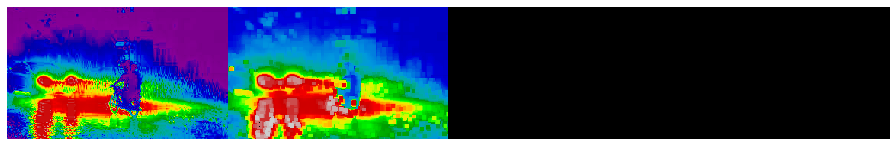

sunrise84.jpg


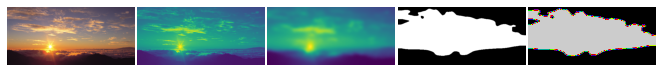

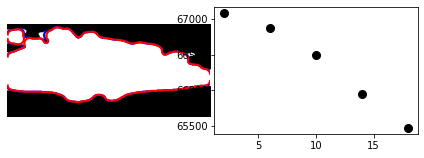

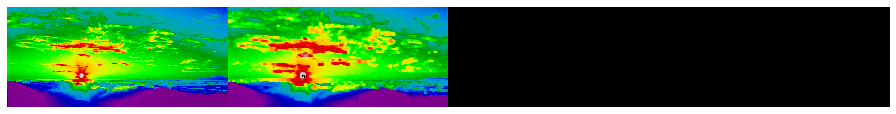

rain115.jpg


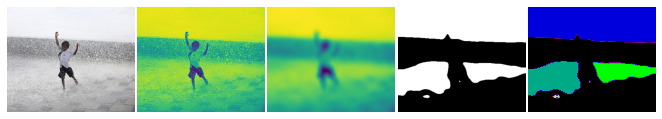

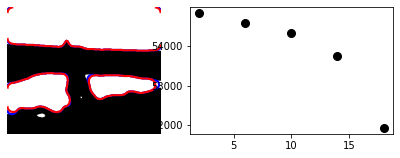

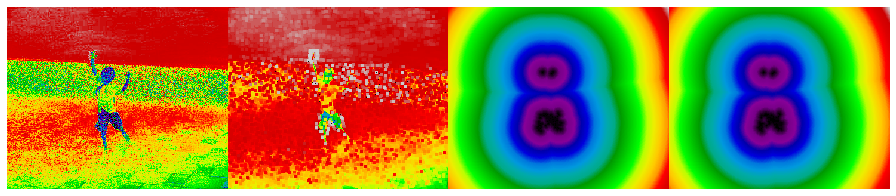

rain157.jpg


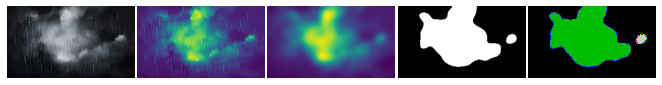

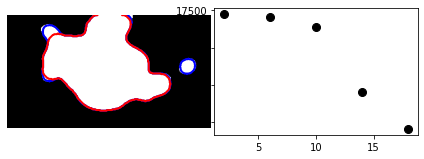

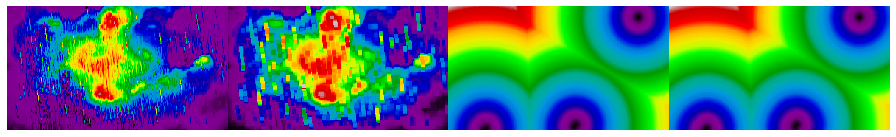

cloudy99.jpg


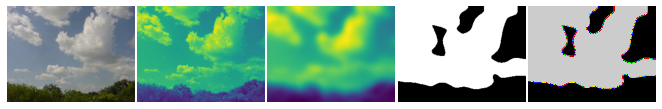

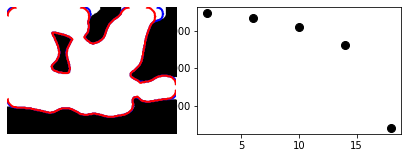

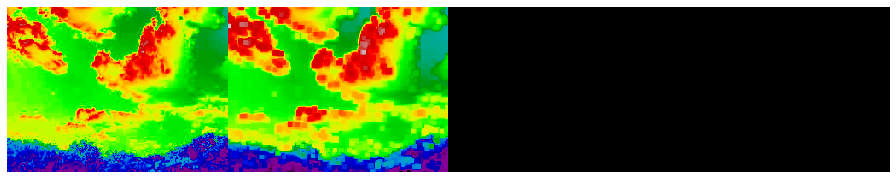

shine55.jpg


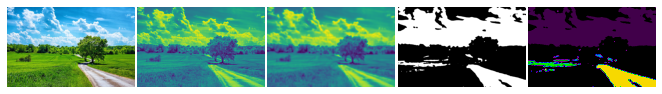

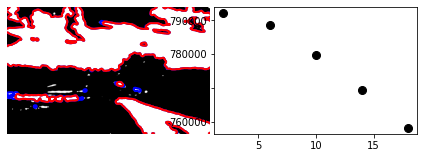

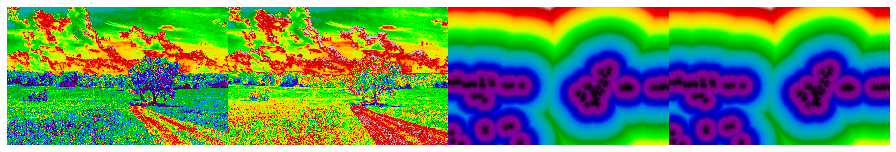

shine37.jpg


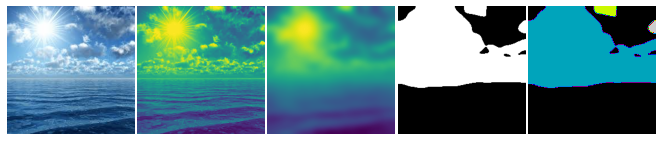

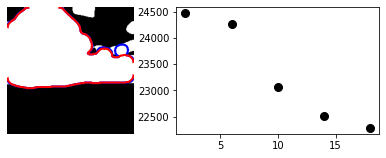

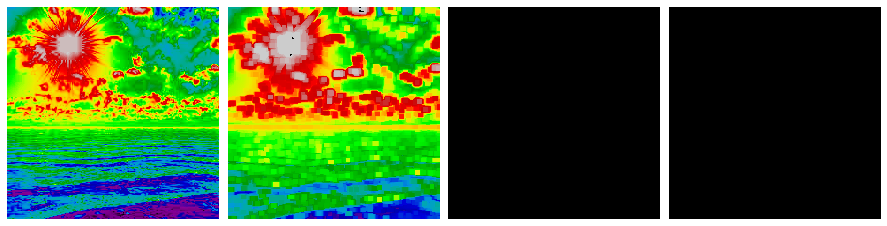

In [17]:
# récupération données
img_extensions = [".jpg", ".jpeg", ".png"]
images = []

files_list = get_dir_files(source_data_path, endwith=".jpg")
nb_img = len(files_list)

ever_done = []

pos = 0

for i in range(0, 10):
    while(pos in ever_done):
        pos = randint(0, nb_img)
    ever_done.append(pos)
    img_path = files_list[pos]
    im = ara_p.get_img(source_data_path+img_path)
    im_grey = ara_p.get_img_black_white(im)
    im_gauss = ara_p.get_gaussian_img(im_grey)
    print(img_path)
    ara_p.display_img_Gaussian(im_gauss, im, im_grey)
    ara_p.display_granulometry(im_gauss)

    ara_p.display_greyscale_dilation(im_grey)
    # ara_p.display_errosion(im_grey)

    
